### FINAL PROJECT(USING DATASCIENCE AND DEEP LEARNING):

### DustLabel History:

In [1]:
#.................................Using deep learning...................................................................#

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
#loading the data frame (02-11-2015 to 30-09-2020)
df = pd.read_csv('Dataset.csv') 
#Show the data frame
df.head(1322)

,Date,Temparature,Humidity,Airpollution,DustLabel
0,02-11-2015,11.20,70.21,20.34,33.11
1,03-11-2015,12.20,71.21,21.34,34.11
2,04-11-2015,13.20,72.21,22.34,35.11
3,05-11-2015,14.20,73.21,23.34,36.11
4,06-11-2015,15.20,74.21,24.34,37.11
...,...,...,...,...,...
1317,26-09-2020,90.14,386.24,730.33,839.21
1318,27-09-2020,91.14,386.24,730.33,840.21
1319,28-09-2020,92.14,386.24,730.33,841.21
1320,29-09-2020,93.14,386.24,730.33,842.21


In [3]:
df.shape

(1322, 5)

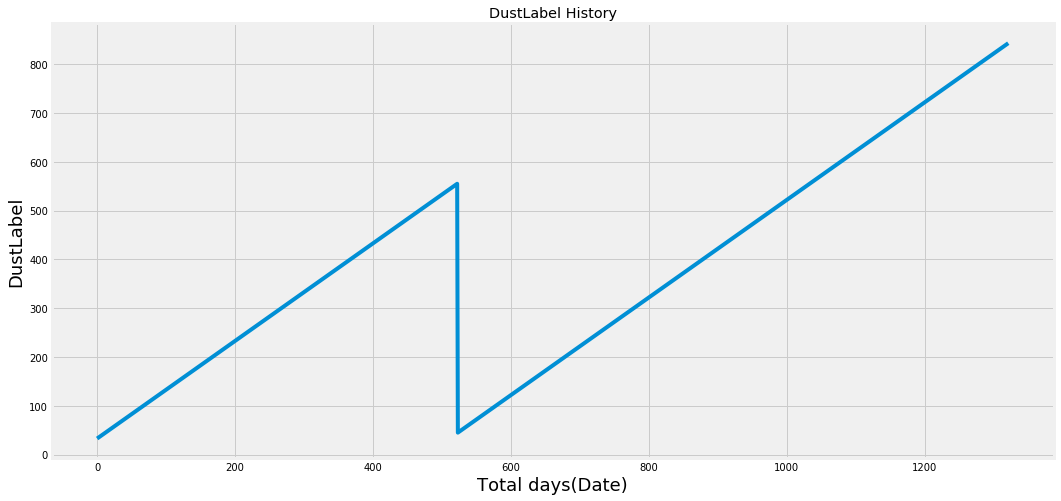

In [4]:
#Visualize the DustLabel history
plt.figure(figsize=(16,8))
plt.title('DustLabel History')
plt.plot(df['DustLabel'])
plt.xlabel('Total days(Date)',fontsize=18)
plt.ylabel('DustLabel',fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'dustLabel' column
data = df.filter(['DustLabel'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [6]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [7]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [8]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [10]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
998/998 [==============================] - 22s 22ms/step - loss: 0.0037


In [13]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index to the rest and all of the columns
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [15]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [16]:
#Getting the models predicted dustLabel values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [17]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.861937162557248

c:\users\91988\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


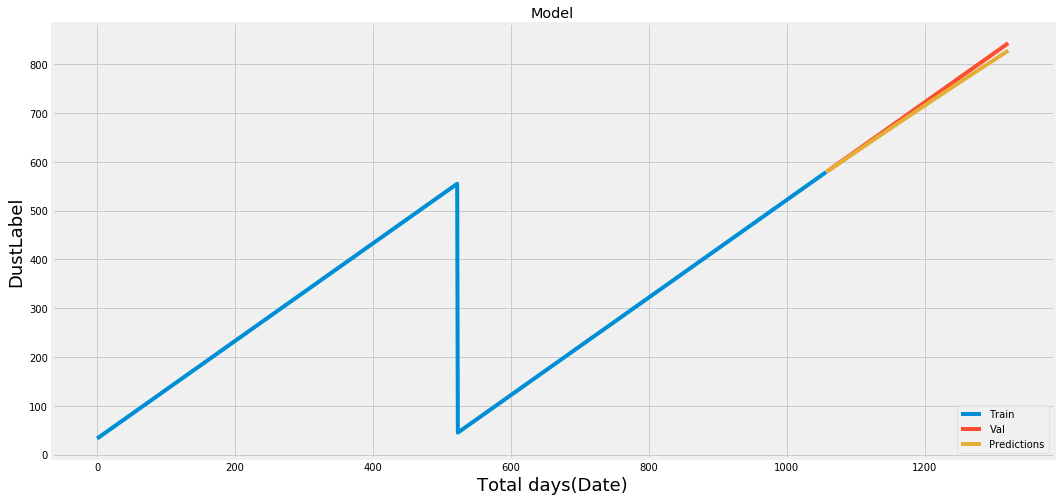

In [18]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Total days(Date)', fontsize=18)
plt.ylabel('DustLabel', fontsize=18)
plt.plot(train['DustLabel'])
plt.plot(valid[['DustLabel', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('E:/SRE/web/DustLabel.png')
plt.show()

In [19]:
#Show the valid and predicted of dust label
valid

,DustLabel,Predictions
1058,580.21,579.870605
1059,581.21,580.841553
1060,582.21,581.812317
1061,583.21,582.782776
1062,584.21,583.753113
...,...,...
1317,839.21,824.227844
1318,840.21,825.140503
1319,841.21,826.053101
1320,842.21,826.965332


In [20]:
valid['Predictions'][1321]

827.87726

In [21]:
data = pd.read_csv('Dataset.csv')
#Create a new dataframe
new_df = data.filter(['DustLabel'])
#Get teh last 60 day of dust label
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled dust label
pred_dust_score = model.predict(X_test)
#undo the scaling 
pred_dust_score = scaler.inverse_transform(pred_dust_score)
print('Future forecast of dust_score:',pred_dust_score)

Future forecast of dust_score: [[828.78906]]
